In [ ]:
#take a model and know all the parameters that it take, generate the synthetic data, for some values of the parameters and then fit this same model on the synthetic data, need to see a fitting paper first.I can see the effect of choosing a suitable initial guess, or I can see the effect of the ratio of the R1 and R2 in the parameter values for which the data is generated.If I am taking any initial guess, then how do I make parameter values choose aa hsusdfha idsvnsvnsvni i, all the models are in model file. also I will need to save the results. before saving the results, I will need to generate the results. 

In [6]:
# where are all the models stored at the first place...? Inside the models file actually, does I need to keep that file up always, yes, do I need to have that file.
# With the press of  one button I should get all the results saved at their respective folders, should I stay in this github repo or should I create a new repo.
# I have to organize a lot of things about 10 things, there is red light on my laptop, how nice was it to read the matplotlib book and then conquered the fear of unknown, like that if we have this and that for github, one day fear of github will also go, and then something about how we ship software, and then we go into the dream land.
#how beautiful will it be to see
#how much can be done in a day?


In [ ]:
#models contain the list of all the diff models
# for m in models:
#     results_for_m=do_sensi_analysis(m,"set some initial guess, dont bother me")

#what is there in the results, results have a image of the fit and also the profile of the actual impedance data and the fitted profile.

#so this is all 
#now I am going to find a paper on fitting that explains something I will search impedance fitting, but I have done this before, but still I will do 
# ok I have 5 min to do it again 

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")



Circuit string: TLMuni_1
Fit: True

Initial guesses:
  TLMuni_1_0 = 1.00e+03 [Ohm]
  TLMuni_1_1 = 1.00e-03 [F]
  TLMuni_1_2 = 9.00e-01 []

Fit parameters:
  TLMuni_1_0 = 6.91e+02  (+/- 5.13e-07) [Ohm]
  TLMuni_1_1 = 6.61e-04  (+/- 5.13e-15) [F]
  TLMuni_1_2 = 1.00e+00  (+/- 1.60e-12) []

R 690.6879965170696
Q 0.0006609999999313062
α 0.9999999999775907

Circuit string: TLMtwo_1
Fit: True

Initial guesses:
  TLMtwo_1_0 = 1.00e+03 [Ohm]
  TLMtwo_1_1 = 1.00e-02 [Ohm F]
  TLMtwo_1_2 = 1.00e-02 [Ohm F]
  TLMtwo_1_3 = 6.00e-01 []
  TLMtwo_1_4 = 9.00e-01 []

Fit parameters:
  TLMtwo_1_0 = 9.42e+02  (+/- 7.50e-06) [Ohm]
  TLMtwo_1_1 = 6.22e-01  (+/- 4.96e-09) [Ohm F]
  TLMtwo_1_2 = 2.96e-01  (+/- 7.16e-09) [Ohm F]
  TLMtwo_1_3 = 2.00e-01  (+/- 8.08e-09) []
  TLMtwo_1_4 = 1.00e+00  (+/- 3.26e-12) []

R1 941.6703919594438
R2 447.4879794498883
Q 0.0006609999998602917
δ1 0.20000000777161214
α 0.9999999999544265

Circuit string: TLMthree_1
Fit: True

Initial guesses:
  TLMthree_1_0 = 1.00e+03 [Ohm]

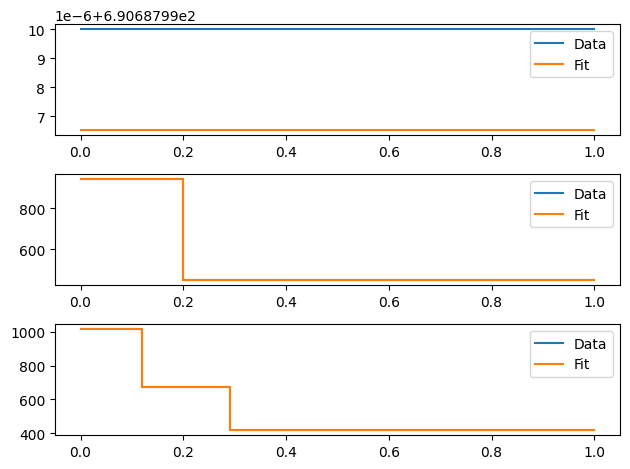

In [21]:
from models import *

Q=6.61e-4
alpha=1

#for uniform
tuni=3.55
Rref=194.56


#two step profile
t21=4.84
t22=2.30
delta21=0.2

#three step profile
t31=5.22
t32=3.47
t33=2.15
delta31=0.12
delta32=0.17


model_to_gen_uni=CustomCircuit(initial_guess=[Rref*tuni,Q,alpha],circuit="TLMuni_1")
# R1, R1Q, R2Q, delta1, alpha
model_to_gen_two_step=CustomCircuit(initial_guess=[Rref*t21,Rref*t21*Q,Rref*t22*Q,delta21,alpha],circuit="TLMtwo_1")
# R1, R1Q, R2Q, R3Q, delta1, delta2, alpha
model_to_gen_three_step=CustomCircuit(initial_guess=[Rref*t31,Rref*t31*Q,Rref*t32*Q,Rref*t33*Q,delta31,delta32,alpha],circuit="TLMthree_1")

f=np.logspace(-3,3,100)

z_data_from_uni=model_to_gen_uni.predict(frequencies=f)
z_data_from_two_step=model_to_gen_two_step.predict(frequencies=f)
z_data_from_three_step=model_to_gen_three_step.predict(frequencies=f)

model_to_fit_uni=CustomCircuit(initial_guess=[1000,1e-3,0.9],circuit="TLMuni_1")
model_to_fit_two_step=CustomCircuit(initial_guess=[1000,1e-2,1e-2,0.6,0.9],circuit="TLMtwo_1")
model_to_fit_three_step=CustomCircuit(initial_guess=[1000,1e-2,1e-2,1e-2,0.2,0.2,0.9],circuit="TLMthree_1")

model_to_fit_uni.fit(impedance=z_data_from_uni,frequencies=f,bounds=(0,[np.inf,np.inf,1]))
model_to_fit_two_step.fit(impedance=z_data_from_two_step,frequencies=f,bounds=(0,[np.inf,np.inf,np.inf,1,1]))
model_to_fit_three_step.fit(impedance=z_data_from_three_step,frequencies=f,bounds=(0,[np.inf,np.inf,np.inf,np.inf,0.5,0.5,1]))


fig, [ax1,ax2,ax3]=plt.subplots(3,1)


print(model_to_fit_uni)
R_uni= model_to_fit_uni.parameters_[0]
Q_uni= model_to_fit_uni.parameters_[1]
alpha_uni= model_to_fit_uni.parameters_[2]

ax1.plot([0,1],[tuni*Rref,tuni*Rref])
ax1.plot([0,1],[R_uni,R_uni])
ax1.legend(["Data","Fit"])

print("R",R_uni)
print("Q",Q_uni)
print("α",alpha_uni)

print(model_to_fit_two_step)
R1_2step=model_to_fit_two_step.parameters_[0]
R1Q_2step=model_to_fit_two_step.parameters_[1]
R2Q_2step=model_to_fit_two_step.parameters_[2]
delta1_2step=model_to_fit_two_step.parameters_[3]
alpha_2step=model_to_fit_two_step.parameters_[4]

Q_2step=R1Q_2step/R1_2step
R2_2step=R2Q_2step/Q_2step

ax2.plot([0,delta21,delta21,1],[t21*Rref,t21*Rref,t22*Rref,t22*Rref])
ax2.plot([0,delta1_2step,delta1_2step,1],[R1_2step,R1_2step,R2_2step,R2_2step])
ax2.legend(["Data","Fit"])

print("R1",R1_2step)
print("R2",R2_2step)
print("Q",Q_2step)
print("δ1",delta1_2step)
print("α",alpha_2step)

print(model_to_fit_three_step)
R1_3step=model_to_fit_three_step.parameters_[0]
R1Q_3step=model_to_fit_three_step.parameters_[1]
R2Q_3step=model_to_fit_three_step.parameters_[2]
R3Q_3step=model_to_fit_three_step.parameters_[3]
delta1_3step=model_to_fit_three_step.parameters_[4]
delta2_3step=model_to_fit_three_step.parameters_[5]
alpha_3step=model_to_fit_three_step.parameters_[6]

Q_3step=R1Q_3step/R1_3step
R2_3step=R2Q_3step/Q_3step
R3_3step=R3Q_3step/Q_3step

ax3.plot([0,delta31,delta31,delta32+delta31,delta32+delta31,1],[t31*Rref,t31*Rref,t32*Rref,t32*Rref,t33*Rref,t33*Rref])
ax3.plot([0,delta1_3step,delta1_3step,delta1_3step+delta2_3step,delta1_3step+delta2_3step,1],[R1_3step,R1_3step,R2_3step,R2_3step,R3_3step,R3_3step])
ax3.legend(["Data","Fit"])

print("R1",R1_3step)
print("R2",R2_3step)
print("R3",R3_3step)
print("Q",Q_3step)
print("δ1",delta1_3step)
print("δ2",delta2_3step)
print("α",alpha_3step)

plt.tight_layout()

# for m in models:
#     rslt=fit_model_on_exp(m,data_for_m_taken_from_paper)
#     data_for_m_taken_from_paper=[uni,twostep,threestep,lin,ilin]
#     print(rslt)

# model
